Title: Intro to Clustering
Slug: intro-clustering
Summary: An introduction to what clustering is, a comparison to traditional segmentation and why clustering works better for large data
Date: 2018-05-28 11:00  
Category: Machine Learning
Subcategory: Clustering
Tags: lists, plots, python, math
Keywords: intro clustering machine learning
Authors: Dan Friedman

### Intro to Clustering

Clustering (aka cluster analysis) is an unsupervised machine learning method that segments similar data points into groups. These groups are called **clusters**.

It's considered unsupervised because there's no ground truth value to predict. Instead, we're trying to create structure/meaning from the data.

I regard **segmentation** as a data analysis technique for creating groups from a dataset while I regard **clustering** as a data science technique for more *advanced* creation of groups called clusters.

Let's first walk through a simple segmentation example with generating data, analyzing the data and segmenting groups with a visualization. No knowledge of coding needed to follow along. You can can read the text and visualizations to understand the value of clustering.

### Manual Segmentation

Let's say you have customers use your app, and you'd like to perform more targeted marketing towards them. Historically, you've created videos to highlight a new feature and showed the same video to *all* customers. However, the marketing message in those videos hasn't been relevant for *all* customers.

With a new feature launch, you'd like to develop two short marketing videos - each of which can be geared towards a unique group of customers.

But how can you easily find two different group based on their activity within the app?

One way to answer this question is through segmentation; another method I'll illustrate later is clustering. 

To gather more information on our customers, you poll them on their age and annual income in U.S. dollars.

Below is a sample of data in a format we'll use:

Customer Name | Age | Income Per Year ($)
--- | --- | ---
Joe Smith| 18 | 39000
Michelle Brown | 24 |75000
Ben Stein | 55 | 120000

In the table above, every row is considered an **observation**. Every column is considered a **feature**. We'll use this terminology going forward.

#### Import Modules

In [34]:
from random import randint
import matplotlib.pyplot as pyplot
%matplotlib inline

#### Generate Survey Data

I'll use Python to generate the survey data.

We'll create a large group of relatively young customers and another smaller group of relatively older customers who often earn more than the younger ones.

In [49]:
large_number = 50
small_number = 25

ages_younger = [randint(18, 28) for age in range(large_number)]
ages_older = [randint(25, 66) for age in range(small_number)]

lower_incomes = [randint(5000, 76000) for income in range(large_number)]
higher_incomes = [randint(43000, 160000) for income in range(small_number)]

ages = ages_younger + ages_older
incomes = lower_incomes + higher_incomes

#### Visualize Survey Data

In the visualization below, we can see some closely-knit groups of observations (our customers). We have lots of observations who are in the age range of 18 to 28 and earn on average roughly 50,000 U.S. dollars per year. Another more spread out group could be observations over the age of 30 who earn on average roughly 100,000 U.S. dollars per year. 

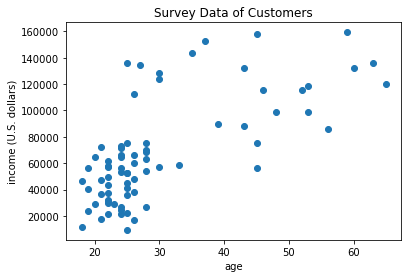

In [50]:
pyplot.scatter(ages, incomes)
pyplot.xlabel("age")
pyplot.ylabel("income (U.S. dollars)")
pyplot.title("Survey Data of Customers");

#### Create Segments in Code

By manual observation, we could segment these observations into two somewhat distinct groups. Two groups allow us to show each group a unique marketing video.

In this example, we want to deliver a marketing message geared towards their income level; we can segment our observations into group by those who earn more than 65,000 U.S. dollars and those who earn less than or equal to that amount.

In Python code below, I'll separate our observations into two groups so we can color code them in a plot.

In [37]:
below_sixty_five_thousand_earners = []
above_sixty_five_thousand_earners = []
age_index = 0
income_index = 1

In [38]:
for customer_survey_data in zip(ages, incomes):
    if customer_survey_data[income_index] > 65000:
        above_sixty_five_thousand_earners.append(customer_survey_data)
    else:
        below_sixty_five_thousand_earners.append(customer_survey_data)

The code below makes unique lists of x-values and y-values of each group to plot from each of those two lists so we can color coordinate the groups.

In [39]:
below_sixty_five_thousand_earners_ages = [customer[age_index] for customer in below_sixty_five_thousand_earners]
below_sixty_five_thousand_earners_incomes = [customer[income_index] for customer in below_sixty_five_thousand_earners]

In [40]:
above_sixty_five_thousand_earners_ages = [customer[age_index] for customer in above_sixty_five_thousand_earners]
above_sixty_five_thousand_earners_incomes = [customer[income_index] for customer in above_sixty_five_thousand_earners]

In the plot below, we can see the lower earners as *green* in color and the higher earners as *orange* in color.

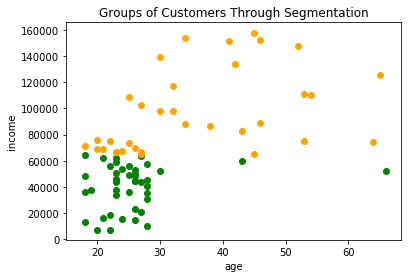

In [41]:
pyplot.scatter(below_sixty_five_thousand_earners_ages, below_sixty_five_thousand_earners_incomes, color='green')
pyplot.scatter(above_sixty_five_thousand_earners_ages, above_sixty_five_thousand_earners_incomes, color='orange')
pyplot.xlabel("age")
pyplot.ylabel("income")
pyplot.title("Groups of Customers Through Segmentation");

While this method of segmentation *works*, it's imperfect. 

Notice how there are several observations in the bottom-left group that are orange and right next to green observations; you'd think they should be in the same group yet with our threshold, they're in separate groups. 

A threshold of 65000 U.S. dollars is rather arbitrary and did a poor job of grouping several nearby observations.

### What's the Value of Clustering Algorithms?

In the example above, it was fairly easy to create two *fairly* distinct groups based on their income level. 

However, what if we collected *more data* in our survey or used more data based on customers' behavior within the app? We could easily gather 4 or more features on customers.

- age
- income per year (U.S. dollars)
- days as a customer on our app
- average minutes spent on our app per week

You can now picture a sample of our data looking like:

Customer Name | Age | Income Per Year (U.S. dollars) | days on app | avg minutes activity per week
--- | --- | --- | --- | ---
Joe Smith| 18 | 39000 | 33 | 5.2
Michelle Brown | 24 |75000 | 210 | 3.0
Mark Jones | 55 | 120000 | 59 | 7.5

Also, what if our app had *tens of thousands* of customers or even *millions*? This would be considered a large number of observations.

With a larger number of features and observations, it'd be nearly impossible to segment the observations by arbitrary threshold to create distinct segments. Once we've collected additional features on each customer, we can no longer visualize the data on a 2-d plane as we did above too.

Here are some benefits of programmatic clustering in which you can quickly and easily:

- work with large numbers of observations and features
- derive clusters with just a few lines of code
- prototype results of 2, 3, 4 or any number of clusters of our observations
- implement results in a web/mobile application with little manual oversight

#### When is Clustering Used in Industry?

Examples:

- segment groups of customers based on their activity with an app to deliver unique marketing messages
- find similar text documents (could also be tweets, posts, etc) by their words/phrases
- data compression to reduce the size of data files

#### Cluster Algorithms

In various programming languages, there are a number of open-source libraries to implement clustering algorithms. Popular ones include K-Means and DBSCAN. 

Different algorithms will often yield different observations per cluster. Therefore, it's best to understand your data well and study up on the types of algorithms available so you can get your desired results.

#### Code to Implement the K-Means Clustering Algorithm

In this post, I won't dive deep into the K-Means algorithm and explanations of the code below. I'll save that for another post.

Let's focus on the last visualization and intrepret the results of this programmatic way to create two clusters.

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [43]:
all_observations = list(zip(ages, incomes))
scaler = StandardScaler()
observations_standardized = scaler.fit_transform(all_observations)

In [44]:
kmeans_object = KMeans(n_clusters=2)
kmeans_object.fit(observations_standardized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
kmeans_predictions = kmeans_object.labels_
kmeans_cluster_centers = kmeans_object.cluster_centers_

In the visualization below, purple dots are one cluster and yellow dots represent another cluster.

The semi-transparent large circles are the centers/centroids of each cluster.

Clustering better identifies nearby observations in the same cluster; we don't see two observations that have practically the same features but are in different clusters like we did with our manual segmentation above.

Also, because of this centroid-based clustering, we can detail the features of the centroid to explain to our stakeholders the general features of our clusters.

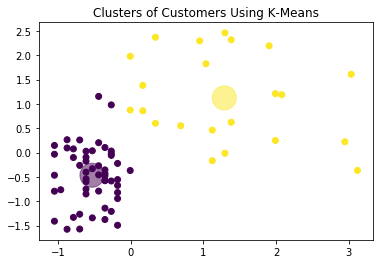

In [46]:
pyplot.scatter(observations_standardized[:, 0], observations_standardized[:, 1], c=kmeans_predictions)
pyplot.scatter(kmeans_cluster_centers[:, 0], kmeans_cluster_centers[:, 1], c=[0,1], s=580, alpha=0.5)
pyplot.title("Clusters of Customers Using K-Means");